In [1]:
%load_ext autoreload
%autoreload 2
from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
from lib_nn_dpe import NN_dpe
from IPython import display

import serial
%config InlineBackend.figure_formats = ['svg']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"

In [2]:
dpe = DPE('COM3')
dpe.set_clock(50)
dpe.shape

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


[64, 64]

In [7]:
dpe2 = DPE('COM8')
dpe2.set_clock(50)
dpe2.shape

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


[64, 64]

....

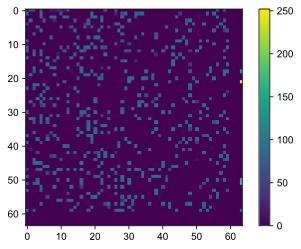

In [20]:
g = dpe2.read(2, Tdly=1000, method='slow')
plt.imshow(g * 1e6)
plt.colorbar()

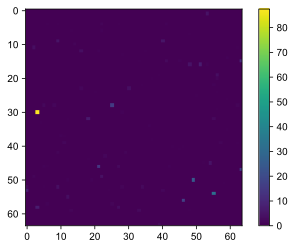

In [3]:
g = dpe.read(0, Tdly=500, method='fast')
plt.imshow(g * 1e6)
plt.colorbar()

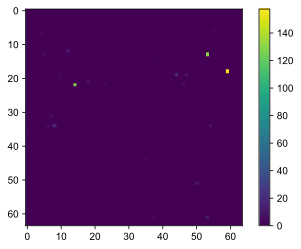

In [4]:
g = dpe.read(1, Tdly=500, method='fast')
plt.imshow(g * 1e6)
plt.colorbar()

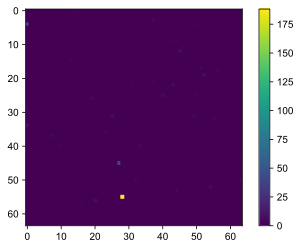

In [5]:
g = dpe.read(2, Tdly=500, method='fast')
plt.imshow(g * 1e6)
plt.colorbar()

In [21]:
dpe = DPE('COM8')
dpe.set_clock(50)
dpe.shape

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


[64, 64]

..

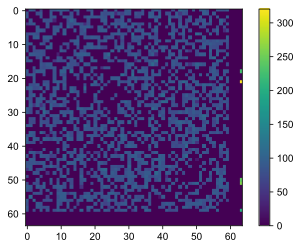

In [23]:
g = dpe.read(2, Tdly=500, method='slow')
plt.imshow(g * 1e6)
plt.colorbar()

In [6]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
# Scale the conductances by 4x to get better separation
G_neg = 4*mat_contents['G_neg']
G_pos = 4*mat_contents['G_pos']

arr = 0
Vgate = 5
Vref = 0.5
vRead = 0.2

targetTolerance = 4e-6

targetGNeg = np.zeros((64,64))
targetGNeg[0:64,0:64] = G_neg[0:64,0:64]

targetGPos = np.zeros((64,64))
targetGPos[0:64,0:64] = G_pos[0:64,0:64]

MselPos = np.zeros((64,64))
MselPos[np.nonzero(targetGPos)] = 1

MselNeg = np.zeros((64,64))
MselNeg[np.nonzero(targetGNeg)] = 1

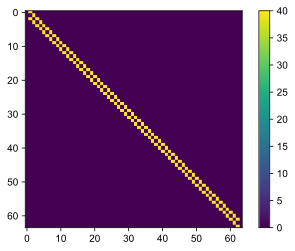

In [8]:
plt.imshow(targetGPos*1e6)
plt.colorbar()

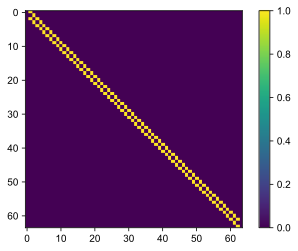

In [12]:
plt.imshow(MselPos)
plt.colorbar()

In [13]:
from lib_tune_g import *

In [ ]:
data1 = dpe.tune_conductance_limited(1, targetGPos, saveHistory=True, maxSteps=300, targetYield=90, maxRetry=2, method='fast', vSetRamp = [0.4, 2.6, 0.2], 
                                     vGateSetRamp = [0.3, 1.4, 0.05], vResetRamp = [0.3, 2.5, 0.1], vGateResetRamp = [5.0, 5.5, 0.5], TwidthSet=10e-6, TwidthReset=1e-3, 
                                     Gtol=6e-6, Msel=MselPos, numReads=3)